In [2]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


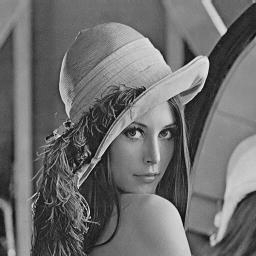

In [4]:
img1 = cv2.imread('/content/gdrive/My Drive/colab/images/lena256.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg1.shape)
# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

(360, 360)


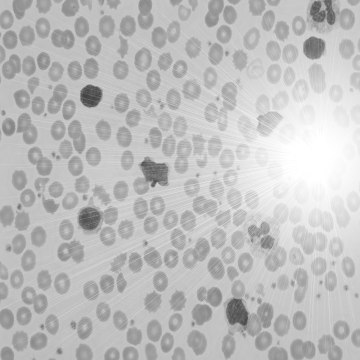

In [7]:
# img1 = cv2.imread('/content/gdrive/My Drive/colab/images/rice.bmp')
# img1 = cv2.imread('/content/gdrive/My Drive/colab/images/cell.bmp')
img1 = cv2.imread('/content/gdrive/My Drive/colab/images/cell-bright.bmp')
# img1 = cv2.imread('/content/gdrive/My Drive/colab/images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg.shape)
# plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

In [31]:
N = 10

dimh = np.int32(gimg.shape[0] / N)
dimw = np.int32(gimg.shape[1] / N)

dh_rest = np.int32(gimg.shape[0] % N)
dw_rest = np.int32(gimg.shape[1] % N)

meanimg = np.zeros((N,N))
outimg = np.zeros((gimg.shape[0], gimg.shape[1]))



In [32]:
def mean_function(img,dimh,dimw,h,w):
  count= 1
  sum = 0
  avg = 0

  for y in range(h,h+dimh):
    for x in range(w,w+dimw):
      sum = sum + img[y][x]
      count = count + 1


  avg = np.int32(sum/count)
  return avg

In [33]:
for h in range(0, gimg.shape[0] - dh_rest, dimh):
  for w in range(0, gimg.shape[1] - dw_rest, dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gimg, dimh, dimw, h, w)

(10, 10)


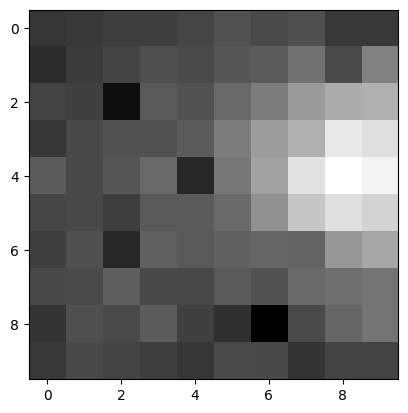

In [34]:
plt.imshow(meanimg, cmap='gray')
print(meanimg.shape)

In [35]:
for h in range(0, gimg.shape[0] - dh_rest):
  for w in range(0, gimg.shape[1] - dw_rest):
    if(gimg[h, w] > meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
      outimg[h, w] = 255
    else:
      outimg[h, w] = 0


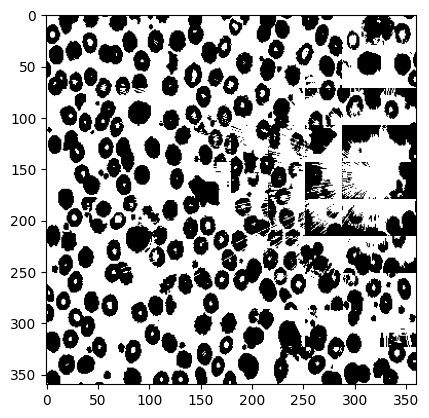

In [36]:
plt.imshow(outimg, cmap='gray')